Setup complete.
OU Model Created:
OrnsteinUhlenbeck({'X0': 95, 'mu': 100, 'theta': 5.0, 'sigma': 5.0})

Simulated short paths shape: (505, 3)


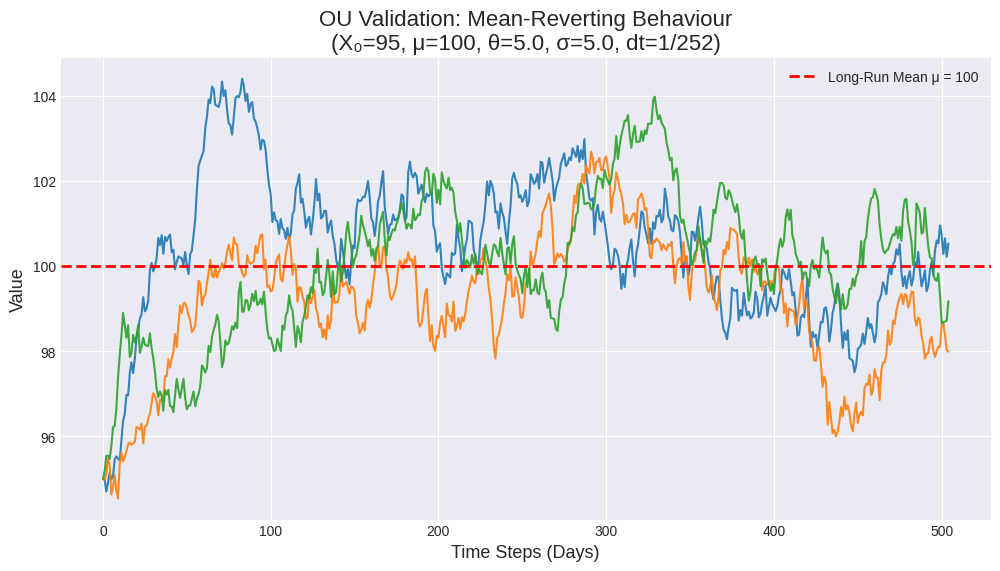

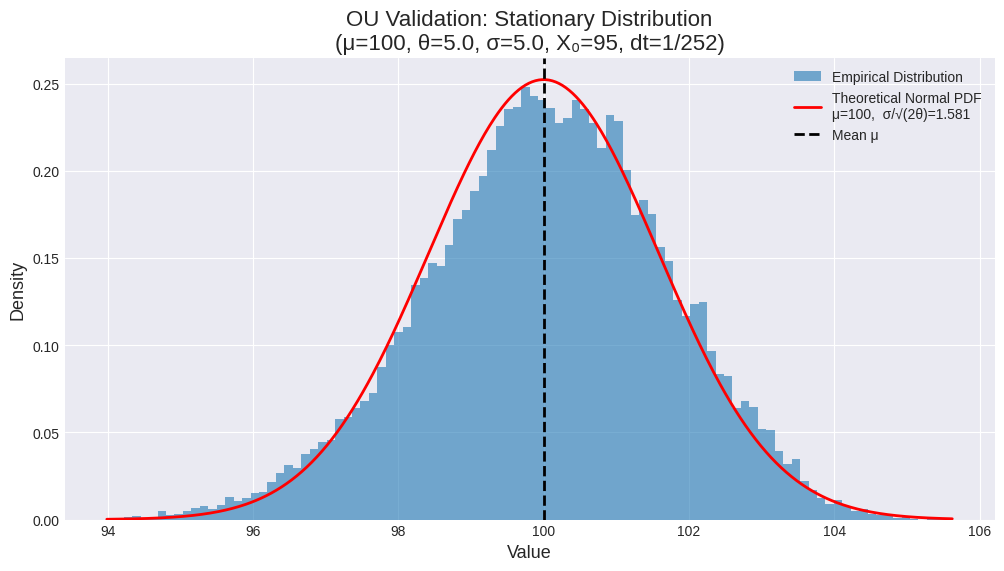

==== Stationary Distribution Check ====
Empirical Mean : 100.0423
Empirical Std  : 1.6625
Theoretical Std: 1.5811



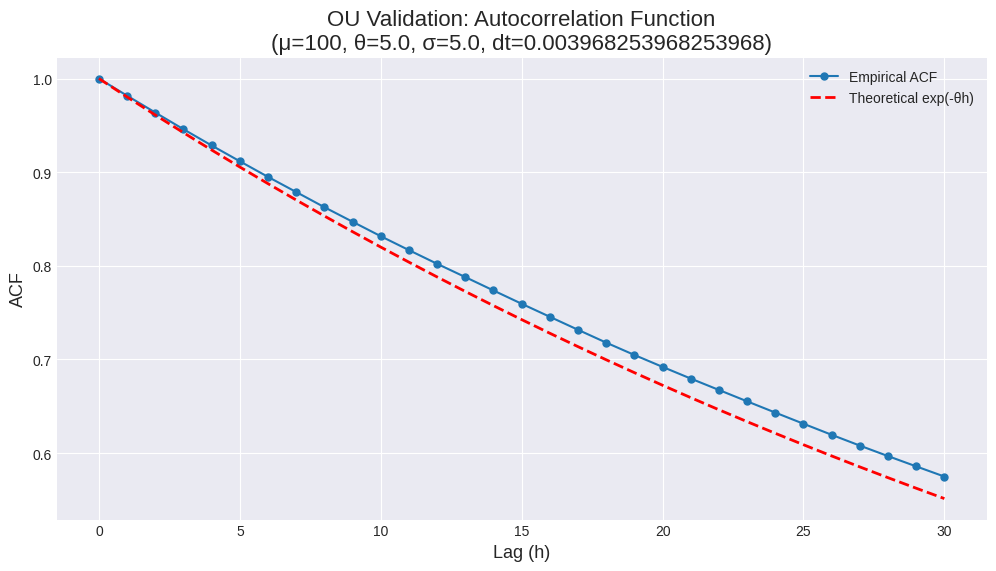

==== ACF Head ====
Lag 0: Empirical = 1.0000,  Theoretical = 1.0000
Lag 1: Empirical = 0.9817,  Theoretical = 0.9804
Lag 2: Empirical = 0.9637,  Theoretical = 0.9611
Lag 3: Empirical = 0.9459,  Theoretical = 0.9422
Lag 4: Empirical = 0.9285,  Theoretical = 0.9237


In [59]:
# ============================================================
# Imports & Setup
# ============================================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm
import sys, os

# Add your src folder to path
sys.path.insert(0, os.path.abspath('../src'))

from models.ou import OrnsteinUhlenbeck

plt.style.use('seaborn-v0_8-darkgrid')
print("Setup complete.")

# ============================================================
# 1. Create OU Model
# ============================================================
ou_params = {
    'X0': 95,
    'mu': 100,
    'theta': 5.0,
    'sigma': 5.0
}

ou_model = OrnsteinUhlenbeck(**ou_params)

print("OU Model Created:")
print(ou_model)
print()

# ============================================================
# 2. Simulate Short Paths (Mean Reversion)
# ============================================================
T = 2.0
dt = 1/252
n_paths = 3

sim_paths = ou_model.simulate(T, dt, n_paths)
print(f"Simulated short paths shape: {sim_paths.shape}")

# ----------------------------
# Plot Mean-Reverting Paths
# ----------------------------
plt.figure(figsize=(12, 6))
plt.plot(sim_paths, alpha=0.9)

plt.axhline(
    ou_params['mu'],
    color='red',
    linestyle='--',
    linewidth=2,
    label=f"Long-Run Mean μ = {ou_params['mu']}"
)

plt.title(
    f"OU Validation: Mean-Reverting Behaviour\n"
    f"(X₀={ou_params['X0']}, μ={ou_params['mu']}, θ={ou_params['theta']}, σ={ou_params['sigma']}, dt=1/252)",
    fontsize=16
)
plt.xlabel("Time Steps (Days)", fontsize=13)
plt.ylabel("Value", fontsize=13)
plt.legend()
plt.show()

# ============================================================
# 3. Stationary Distribution Validation
# ============================================================
T_long = 100
dt_long = 1/252
long_path = ou_model.simulate(T_long, dt_long, n_paths=1).flatten()

mu = ou_params['mu']
theta = ou_params['theta']
sigma = ou_params['sigma']

stationary_std = sigma / np.sqrt(2 * theta)

# ----------------------------
# Histogram + Theoretical PDF
# ----------------------------
plt.figure(figsize=(12, 6))
plt.hist(long_path, bins=100, density=True, alpha=0.6, label="Empirical Distribution")

x_vals = np.linspace(min(long_path), max(long_path), 500)
plt.plot(
    x_vals,
    norm.pdf(x_vals, mu, stationary_std),
    'r-', linewidth=2,
    label=f"Theoretical Normal PDF\nμ={mu},  σ/√(2θ)={stationary_std:.3f}"
)

plt.axvline(mu, color="black", linestyle="--", linewidth=2, label="Mean μ")

plt.title(
    f"OU Validation: Stationary Distribution\n"
    f"(μ={mu}, θ={theta}, σ={sigma}, X₀={ou_params['X0']}, dt=1/252)",
    fontsize=16
)
plt.xlabel("Value", fontsize=13)
plt.ylabel("Density", fontsize=13)
plt.legend()
plt.show()

print("==== Stationary Distribution Check ====")
print(f"Empirical Mean : {np.mean(long_path):.4f}")
print(f"Empirical Std  : {np.std(long_path):.4f}")
print(f"Theoretical Std: {stationary_std:.4f}")
print()

# ============================================================
# 4. ACF Validation (exp(-θh))
# ============================================================
horizon = 30
lags = np.arange(horizon + 1)

acf_emp = sm.tsa.acf(long_path, nlags=horizon)
acf_theo = np.exp(-theta * lags * dt_long)

plt.figure(figsize=(12, 6))
plt.plot(lags, acf_emp, 'o-', label="Empirical ACF", markersize=5)
plt.plot(lags, acf_theo, 'r--', linewidth=2, label="Theoretical exp(-θh)")

plt.title(
    f"OU Validation: Autocorrelation Function\n"
    f"(μ={mu}, θ={theta}, σ={sigma}, dt={dt_long})",
    fontsize=16
)
plt.xlabel("Lag (h)", fontsize=13)
plt.ylabel("ACF", fontsize=13)
plt.legend()
plt.show()

print("==== ACF Head ====")
for i in range(5):
    print(f"Lag {i}: Empirical = {acf_emp[i]:.4f},  Theoretical = {acf_theo[i]:.4f}")
